<a href="https://colab.research.google.com/github/RA2112704010006/ML_PTutorial_LoanAmountPrediction/blob/main/SVM_tutorialML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the train dataset

In [ ]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Importing the test dataset

In [4]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


Gathering information of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Computing the mode of each categorical variable

In [7]:
print('Gender Mode: ', df['Gender'].mode())
print('Married  Mode: ', df['Married'].mode())
print('Self_Employed Mode: ', df['Self_Employed'].mode())
print('Credit_History Mode: ', df['Credit_History'].mode())

Gender Mode:  0    Male
Name: Gender, dtype: object
Married  Mode:  0    Yes
Name: Married, dtype: object
Self_Employed Mode:  0    No
Name: Self_Employed, dtype: object
Credit_History Mode:  0    1.0
Name: Credit_History, dtype: float64


Creating a bar plot using the Seaborn library

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

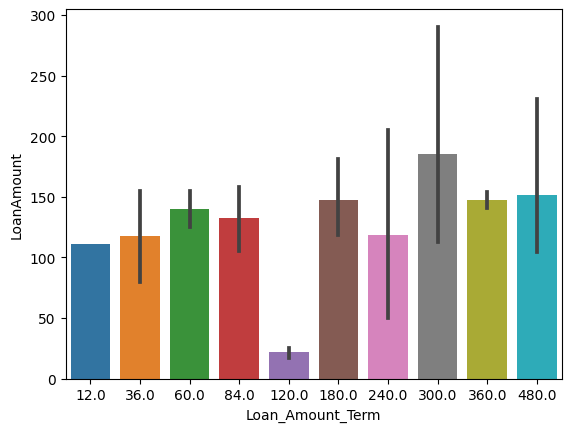

In [6]:
sns.barplot(x = df['Loan_Amount_Term'], y = df['LoanAmount'])

Boolean Indexing

In [8]:
df[['Loan_Amount_Term', 'LoanAmount']][df['Loan_Amount_Term'].isnull()]

,Loan_Amount_Term,LoanAmount
19,NaN,115.0
36,NaN,100.0
44,NaN,96.0
45,NaN,88.0
73,NaN,95.0
112,NaN,152.0
165,NaN,182.0
197,NaN,120.0
223,NaN,175.0
232,NaN,120.0


Quick overview of the distribution of values

In [9]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Value Substitution

In [10]:
df['Dependents'].replace('3+',3,inplace = True)
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

Boolean Indexing

In [11]:
df[['Dependents', 'Married']][df['Dependents'].isnull()]

,Dependents,Married
102,NaN,Yes
104,NaN,NaN
120,NaN,Yes
226,NaN,Yes
228,NaN,NaN
293,NaN,No
301,NaN,Yes
332,NaN,No
335,NaN,Yes
346,NaN,Yes


Missing value imputation

In [12]:
df['Gender'].fillna('Male', inplace = True)
df['Married'].fillna('Yes', inplace = True)
df['Self_Employed'].fillna('No', inplace = True)
df['Credit_History'].fillna('1.0', inplace = True)
df['LoanAmount'].fillna((df['LoanAmount'].mean()), inplace = True)
df['Loan_Amount_Term'].fillna('84', inplace = True)
df['Dependents'].fillna(0, inplace = True)

DataType conversion

In [13]:
df['Dependents'] = df['Dependents'].astype('int')
df['Dependents'].dtype

dtype('int64')

Missing Value Detection

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Column Removal or Column Dropping

In [15]:
df.drop('Loan_ID', axis = 1, inplace = True)

Box Plot Visualization

<Figure size 1000x400 with 0 Axes>

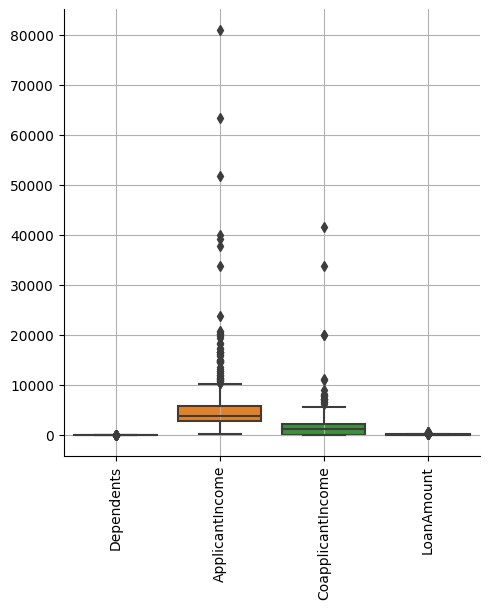

In [16]:
plt.figure(figsize = (10,4))
sns.catplot(data = df, kind = 'box')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Frequency Plot

<Axes: xlabel='Education', ylabel='count'>

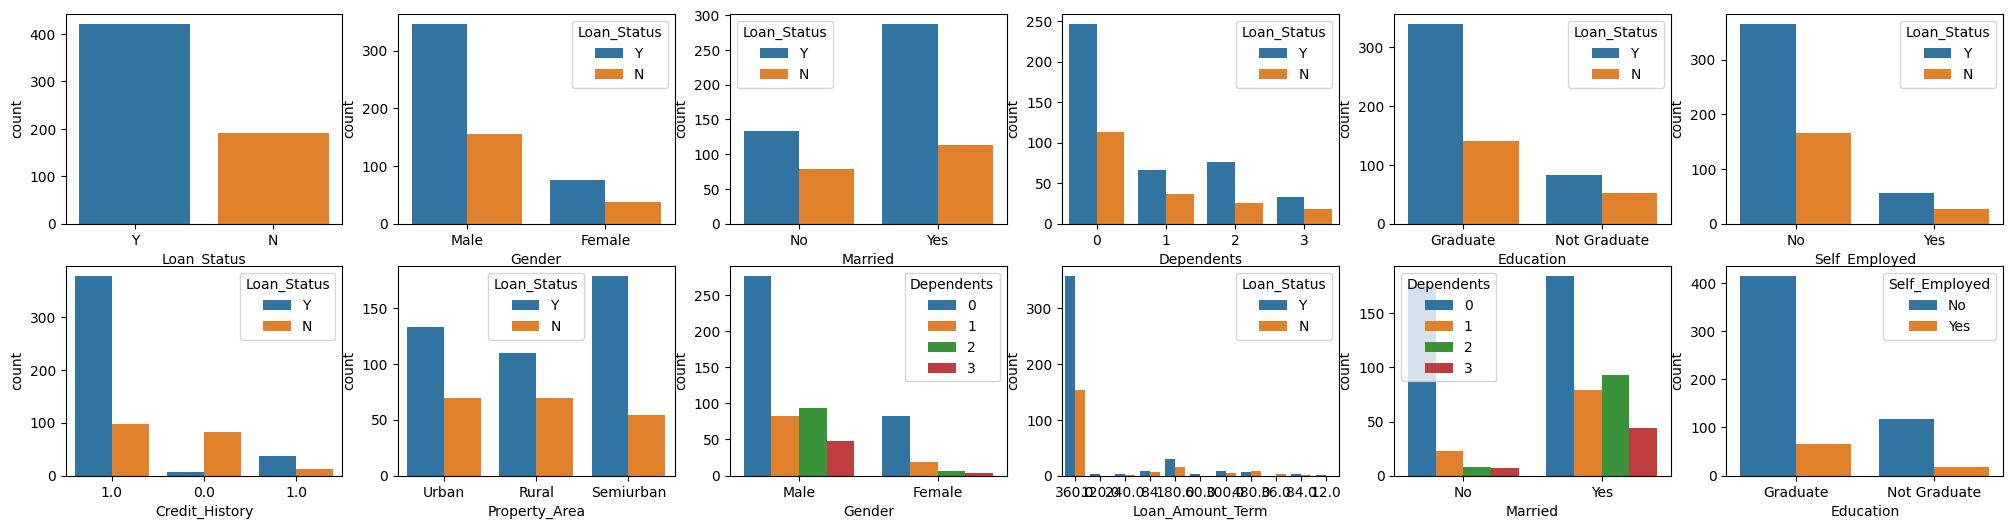

In [17]:
fig, axs = plt.subplots(figsize = (25,6), ncols = 6, nrows = 2)
sns.countplot(x = df['Loan_Status'], ax = axs[0,0])
sns.countplot(x = df['Gender'], hue = df['Loan_Status'], ax = axs[0,1])
sns.countplot(x = df['Married'], hue = df['Loan_Status'], ax = axs[0,2])
sns.countplot(x = df['Dependents'], hue = df['Loan_Status'], ax = axs[0,3])
sns.countplot(x = df['Education'], hue = df['Loan_Status'], ax = axs[0,4])
sns.countplot(x = df['Self_Employed'], hue = df['Loan_Status'], ax = axs[0,5])

sns.countplot(x = df['Credit_History'], hue = df['Loan_Status'], ax = axs[1,0])
sns.countplot(x = df['Property_Area'], hue = df['Loan_Status'], ax = axs[1,1])
sns.countplot(x = df['Gender'], hue = df['Dependents'], ax = axs[1,2])
sns.countplot(x = df['Loan_Amount_Term'], hue = df['Loan_Status'], ax = axs[1,3])
sns.countplot(x = df['Married'], hue = df['Dependents'], ax = axs[1,4])
sns.countplot(x = df['Education'], hue = df['Self_Employed'], ax = axs[1,5])

Standardization

Identifying which columns in the DataFrame contain non-numeric data

In [19]:
obj_col = df.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Converting Object to Numeric data type

In [20]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[obj_col] = df[obj_col].astype(str)
df[obj_col] = oe.fit_transform(df[obj_col])
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,6.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,6.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,6.0,1.0,2.0,1.0


Changing Variable

In [21]:
data = df

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df.iloc[:,:-1] = ss.fit_transform(df.iloc[:,:-1])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298,1.0


Splitting the Data

In [23]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298


Train-Test split on the dataset

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state = 4, test_size = 0.25, stratify = y)

Making Machine Learning Model that fits and evaluates on training and testing data

In [25]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    train_accuracy = model.score(xtrain,ytrain)
    test_accuracy = model.score(xtest, ytest)
    print(str(model)[:-2], 'Accuracy')
    print('Accuracy: ', accuracy_score(ytest,ypred), "\nClassification Report: \n", classification_report(ytest, ypred), '\nConfusion Matrix: \n', confusion_matrix(ytest, ypred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')
    print()
    print()
    return model


Importing Libraries foe Accuracy score, Confusion Matrix and Classification Report

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Using SVM Mode

In [29]:
from sklearn import svm

In [33]:
from sklearn.svm import SVC
svc = mymodel(SVC())

SVC Accuracy
Accuracy:  0.8246753246753247 
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.44      0.61        48
         1.0       0.80      1.00      0.89       106

    accuracy                           0.82       154
   macro avg       0.90      0.72      0.75       154
weighted avg       0.86      0.82      0.80       154
 
Confusion Matrix: 
 [[ 21  27]
 [  0 106]]
Training Accuracy: 0.8108695652173913
Testing Accuracy: 0.8246753246753247


